# CLPS1520 Tutorial 6
## Functions covered in this tutorial: 
### `imtranslate, eye, stereoAnaglyph`
## Concepts covered in this tutorial: 
### Shifting images

Hello everyone, and welcome to Tutorial 6! First we'll start with some image manipulation, and then go into creating stereo images! Let's begin.
___

Load the image '`rice.png`'. This is another of Matlab's built-in demo images, so you can just reference it as given in this tutorial. Use the function `imtranslate` to slide the image down to the right by 10 rows and 10 columns. `imtranslate` takes in (img, [rows cols]). Then, visualize the result. What did `imtranslate` do?

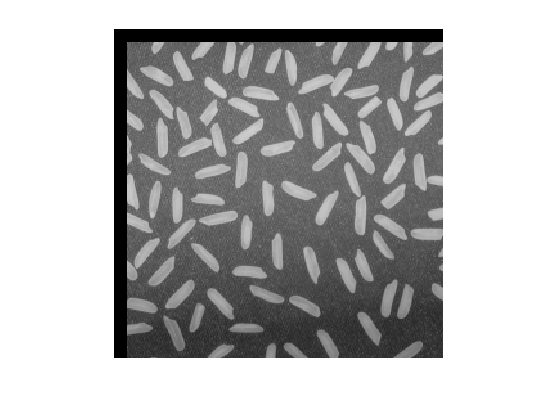

In [1]:
rice = imread('rice.png');
rice_slide = imtranslate(rice, [10 10]);
imshow(rice_slide)

Now check the size of the image. Did the size change from the original image 'rice.png'? If not, think about what `imtranslate` did. Try playing around with greater translations, you can even try negative values if you'd like.

In [2]:
size(rice_slide)


ans =

   256   256



Instead of simply translating an image, now we're going to shift an image but then pad the cropped part of the image to the negative space that is left behind. Think of it like wrapping the bottom and right edges of the rice image back to the black areas in the example above. 

To do this, we'll need help from another function. The function `eye` takes in a number n and returns an identity matrix of size `n x n`. An identity matrix is a matrix of zeros, with ones down the diagonal. To visualize one, type `eye(5)` in the cell below. Identity matrices are used often in linear algebra for their magical properties in matrix multiplication. Today we will use them to reorganize the rows of the image we would like to shift.

Now, create an identity matrix with `eye` with one of the dimensions of 'rice' as the input. (It doesn't matter which you use, height or width, because they are the same for 'rice').


In [3]:
[m,n] = size(rice);

rice_eye = eye(n);

Crop the first 50 rows of the identity matrix you created to the bottom  of the identity matrix. An example to visualize this:

`[1     0     0]           [0     1     0]`

`[0     1     0]  ---->    [0     0     1]`

`[0     0     1]           [1     0     0]`

In the example, a 3 x 3 identity matrix has its first row now on it's
bottom. A useful function here may be `vertcat`, a vertical variant of
the function we previously covered, `cat`.

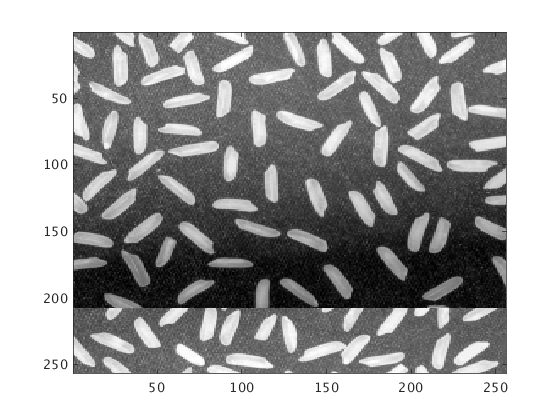

In [4]:
shift = 50;

T = eye(n);
T = vertcat(T(shift:n,:),T(1:shift-1,:));
rice_shift = T*double(rice);
imagesc(rice_shift)
colormap gray

After creating this shifted identity matrix, multiply the matrix with your image (`eye*img`) and then view the result. Did you shift correctly? You might notice that what you did, by concatenating a part of the image  to the rest of it in a different place, you could also directly do to the image without multiplying with an identity. This is completely true and you could have done this. However, a neat trick from linear algebra allows us utilize the identity matrix for more than just shifting the image up or down. Try changing the order of the multiplication to (`img*eye`). What did the multiplication do? 

---

Finally, we'll be going over the function `stereoAnaglyph` and how to use it. First, let's load two images. Load the right and left '`lamp`' images, 'lampL.jpg' and 'lampR.jpg'.

In [5]:
lampL = imread('lampL.jpg');
lampR = imread('lampR.jpg');

Now, run stereoAnaglyph on the two images, and then visualize the result.

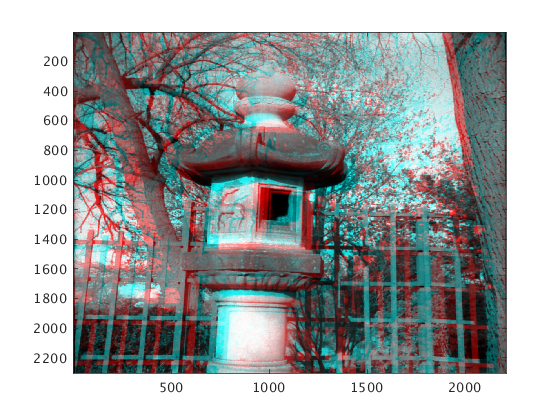

In [6]:
lamp_stereo = stereoAnaglyph(lampL,lampR);
imagesc(lamp_stereo)
colormap gray

Congratulations! You now have stereo images. Hopefully these functions will be useful in your completion of Assignment 4.